<a href="https://colab.research.google.com/github/PRASANNA-416/EC386-Image-processing-Project/blob/main/Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
train_path="/content/gdrive/MyDrive/Colab Notebooks/Mini_Project/Train"
test_path="/content/gdrive/MyDrive/Colab Notebooks/Mini_Project/Test1"
val_path="/content/gdrive/MyDrive/Colab Notebooks/Mini_Project/Test"

In [ ]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)

x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

In [ ]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 132 images belonging to 3 classes.
Found 31 images belonging to 3 classes.
Found 31 images belonging to 3 classes.


In [ ]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [ ]:
training_set.class_indices
train_y.shape,test_y.shape,val_y.shape

((132,), (31,), (31,))

In [ ]:
vgg = VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False)
# resnet_model = Sequential()

# pretrained_model= tf.keras.applications.ResNet50(include_top=False,
#                    input_shape=(224,224,3),
#                    pooling='avg',classes=3,
#                    weights='imagenet')

# pretrained_model.summary()

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(3, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [ ]:
# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=10,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/10
5/5 [==============================] - 117s 20s/step - loss: 1.9918 - accuracy: 0.3485 - val_loss: 1.0817 - val_accuracy: 0.5484
Epoch 2/10
5/5 [==============================] - 107s 22s/step - loss: 1.1657 - accuracy: 0.6515 - val_loss: 0.9715 - val_accuracy: 0.6774
Epoch 3/10
5/5 [==============================] - 100s 20s/step - loss: 0.8309 - accuracy: 0.6515 - val_loss: 0.6971 - val_accuracy: 0.6129
Epoch 4/10
5/5 [==============================] - 100s 20s/step - loss: 0.5136 - accuracy: 0.7652 - val_loss: 0.9338 - val_accuracy: 0.6774
Epoch 5/10
5/5 [==============================] - 98s 19s/step - loss: 0.5019 - accuracy: 0.7879 - val_loss: 0.3425 - val_accuracy: 0.8065
Epoch 6/10
5/5 [==============================] - 102s 20s/step - loss: 0.2222 - accuracy: 0.9394 - val_loss: 0.3206 - val_accuracy: 0.9032
Epoch 7/10
5/5 [==============================] - 105s 22s/step - loss: 0.1665 - accuracy: 0.9091 - val_loss: 0.3589 - val_accuracy: 0.8710
Epoch 8/10
5/5 [=====

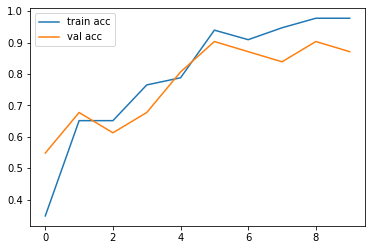

In [ ]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg-acc-rps-1.png')

plt.show()

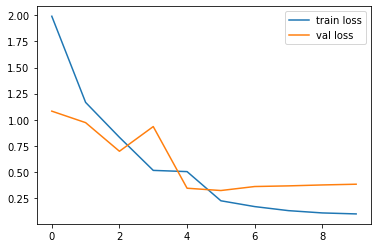

In [ ]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [ ]:
model.evaluate(test_x,test_y,batch_size=32)

1/1 [==============================] - 22s 22s/step - loss: 0.0588 - accuracy: 1.0000


[0.05879366025328636, 1.0]

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

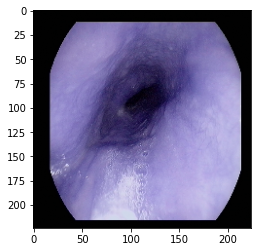

In [ ]:
i = 0
for img in test_x:
  plt.imshow(img)

In [ ]:
#predict
y_pred=model.predict(test_x)
print(y_pred)

y_pred=np.argmax(y_pred,axis=1)

1/1 [==============================] - 18s 18s/step
[[9.4192034e-01 3.3643980e-02 2.4435701e-02]
 [9.9969101e-01 2.4361313e-04 6.5391236e-05]
 [9.9961382e-01 2.5760164e-04 1.2852835e-04]
 [9.9883431e-01 8.7805628e-04 2.8764299e-04]
 [9.9940813e-01 5.8550999e-04 6.2043146e-06]
 [9.9919981e-01 7.9884799e-04 1.3567075e-06]
 [9.9867237e-01 1.3202429e-03 7.3916058e-06]
 [9.9993736e-01 5.8598682e-05 3.9470251e-06]
 [9.9975562e-01 2.0730851e-04 3.7158443e-05]
 [9.9992949e-01 6.6404849e-05 4.0890072e-06]
 [1.3759948e-02 9.2233753e-01 6.3902527e-02]
 [2.8151498e-04 9.9957234e-01 1.4613011e-04]
 [8.3229672e-03 9.8434705e-01 7.3299934e-03]
 [1.7483942e-02 9.3881983e-01 4.3696195e-02]
 [9.0325033e-05 9.8500419e-01 1.4905550e-02]
 [2.4876152e-03 9.4795781e-01 4.9554702e-02]
 [2.1696351e-03 9.6764708e-01 3.0183291e-02]
 [4.4172914e-03 6.7664850e-01 3.1893423e-01]
 [4.8652967e-03 9.3117207e-01 6.3962452e-02]
 [1.8248429e-04 9.8903245e-01 1.0785119e-02]
 [4.9984949e-03 1.3277303e-01 8.6222845e-01]
 [1

In [ ]:
#get classification report
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



In [ ]:
#get confusion matrix
print(confusion_matrix(y_pred,test_y))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 11]]


In [ ]:
print(y_pred[26])

2


1.0


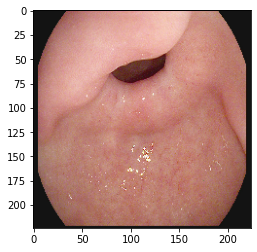

In [ ]:
for img,test_y in test_set:
  plt.imshow(img[0])
  print(test_y[0])
  break